# Group Assignment 

In [1]:
from pylab import *
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

## Read the data in from CSV and consolidate it into a single file

In [2]:
opel_corsa_01 = pd.read_csv("data/opel_corsa_01.csv", sep = ';')
opel_corsa_01["Car"] = "opel"
opel_corsa_01["Journey"] = 1


opel_corsa_02 = pd.read_csv("data/opel_corsa_02.csv", sep = ';')
opel_corsa_02["Car"] = "opel"
opel_corsa_02["Journey"] = 2

peugeot_207_01 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
peugeot_207_01["Car"] = "peugeot"
peugeot_207_01["Journey"] = 3

peugeot_207_02 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
peugeot_207_02["Car"] = "peugeot"
peugeot_207_02["Journey"] = 4

dataset = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]

combined = pd.concat(dataset)
combined= combined.reset_index()

data_pre_cleaning = combined.drop('Unnamed: 0', axis = 1)

data_pre_cleaning.to_csv("data/pre_cleaning_dataset.csv",index = False)

In [3]:
data_pre_cleaning.index.is_unique

True

In [4]:
data_pre_cleaning.describe()

index  AltitudeVariation  VehicleSpeedInstantaneous  \
count  27528.000000       27528.000000               27522.000000   
mean    3645.335331          -0.293105                  43.551822   
std     2259.894350           2.184547                  35.695948   
min        0.000000         -24.600006                   0.000000   
25%     1720.000000          -1.500000                  14.861880   
50%     3440.500000          -0.199997                  36.000000   
75%     5517.250000           0.700012                  63.899998   
max     8198.000000          10.700012                 124.749725   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count         27528.000000          27528.000000           27528.000000   
mean             43.774668            173.723456              -0.021700   
std              33.060156            190.952655               2.595848   
min               0.000000              0.000000            -103.500000   
25%              18.077400             44.289176              -0.900002   
50%              33.539999            111.936149               0.000000   
75%              60.598750            232.502979               0.900002   
max             121.330733           1418.370369              97.199997   

       LongitudinalAcceleration    EngineLoad  EngineCoolantTemperature  \
count              27528.000000  27518.000000              27518.000000   
mean                   0.946825     38.752831                 71.452068   
std                    1.457305     28.328987                 15.432489   
min                   -2.380000      0.000000                 12.000000   
25%                    0.099200     18.431374                 67.000000   
50%                    0.785100     31.372549                 79.000000   
75%                    1.450700     67.058823                 80.000000   
max                    8.477800    100.000000                 89.000000   

       ManifoldAbsolutePressure     EngineRPM   MassAirFlow  \
count              27518.000000  27518.000000  27518.000000   
mean                 116.769678   1553.219129     17.070594   
std                   20.459072    592.953299      9.810971   
min                   88.000000      0.000000      0.880000   
25%                  103.000000    941.625000      7.852500   
50%                  108.000000   1557.500000     16.490000   
75%                  126.000000   2059.000000     23.830000   
max                  252.000000   3167.000000     73.250000   

       IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  \
count          27518.000000          27528.000000            27518.000000   
mean              27.045825              0.231125               14.271932   
std               12.526414              3.268192                4.324763   
min                7.000000             -2.763100                7.271883   
25%               17.000000             -0.783000               10.681483   
50%               22.000000             -0.248600               13.769330   
75%               37.000000              0.164100               16.677401   
max               65.000000             17.944800               45.336861   

            Journey  
count  27528.000000  
mean       2.637860  
std        1.156746  
min        1.000000  
25%        1.000000  
50%        3.000000  
75%        4.000000  
max        4.000000

#### Quickly plot all the data

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

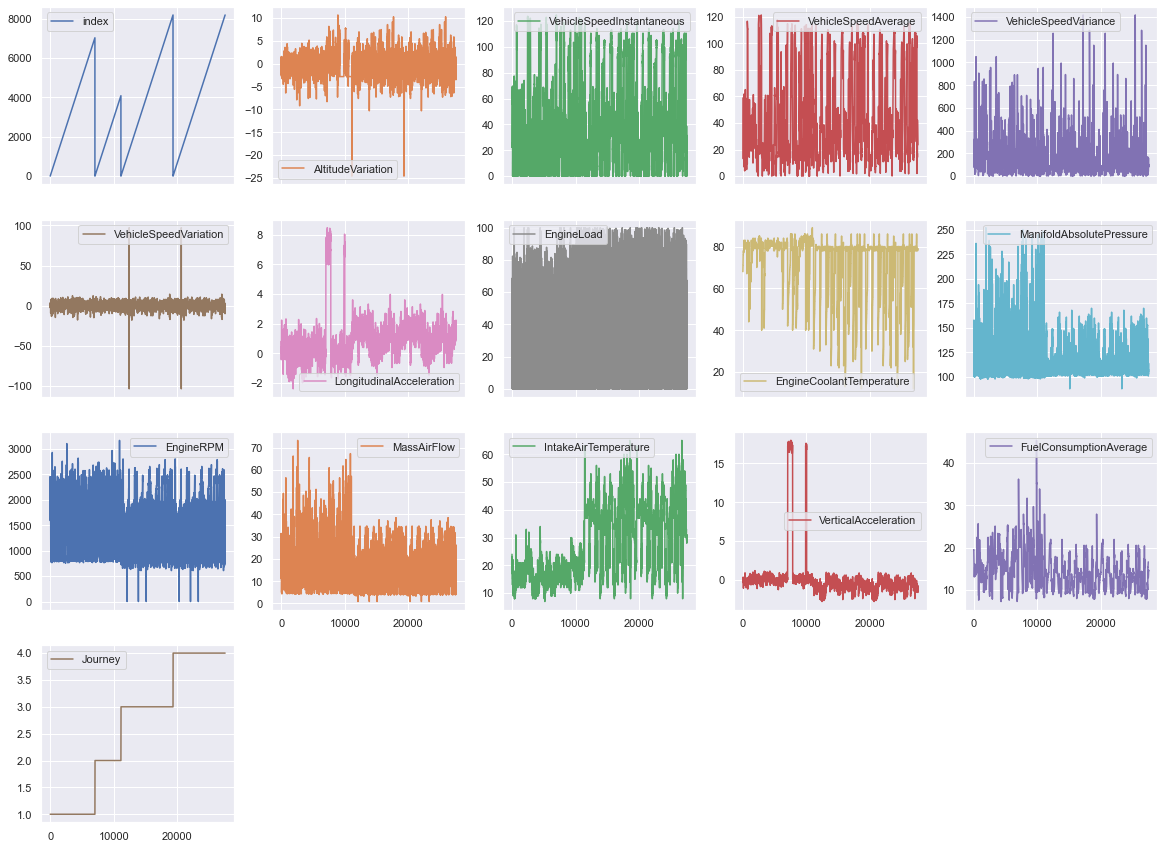

In [5]:
sns.set()
data_pre_cleaning.plot(subplots=True, layout=(4,5), figsize=(20,15))

##### Find all text classifiers for replacement to numerical values

In [6]:
data_pre_cleaning.roadSurface.unique()

array(['SmoothCondition', 'UnevenCondition', 'FullOfHolesCondition'],
      dtype=object)

In [7]:
data_pre_cleaning.traffic.unique()

array(['LowCongestionCondition', 'NormalCongestionCondition',
       'HighCongestionCondition'], dtype=object)

In [8]:
data_pre_cleaning.drivingStyle.unique()

array(['EvenPaceStyle', 'AggressiveStyle'], dtype=object)

In [9]:
data_pre_cleaning.Car.unique()

array(['opel', 'peugeot'], dtype=object)

### Replace text classifiers with numerical classifiers

In [10]:
data_pre_cleaning.roadSurface = data_pre_cleaning.roadSurface.replace('SmoothCondition', 2)
data_pre_cleaning.roadSurface = data_pre_cleaning.roadSurface.replace('UnevenCondition', 1)
data_pre_cleaning.roadSurface = data_pre_cleaning.roadSurface.replace('FullOfHolesCondition', 0)

data_pre_cleaning.traffic = data_pre_cleaning.traffic.replace('LowCongestionCondition', 0)
data_pre_cleaning.traffic = data_pre_cleaning.traffic.replace('NormalCongestionCondition', 1)
data_pre_cleaning.traffic = data_pre_cleaning.traffic.replace('HighCongestionCondition', 2)

data_pre_cleaning.drivingStyle = data_pre_cleaning.drivingStyle.replace('EvenPaceStyle', 0)
data_pre_cleaning.drivingStyle = data_pre_cleaning.drivingStyle.replace('AggressiveStyle', 1)

data_pre_cleaning.Car = data_pre_cleaning.Car.replace('opel', 0)
data_pre_cleaning.Car = data_pre_cleaning.Car.replace('peugeot', 1)


In [11]:
df1 = data_pre_cleaning[data_pre_cleaning.isna().any(axis=1)]

In [12]:
df2 = data_pre_cleaning.dropna(axis=0)
df2.shape

(27514, 20)

In [13]:
data_pre_cleaning.shape

(27528, 20)

In [14]:
data_pre_cleaning = data_pre_cleaning.dropna(axis=0)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

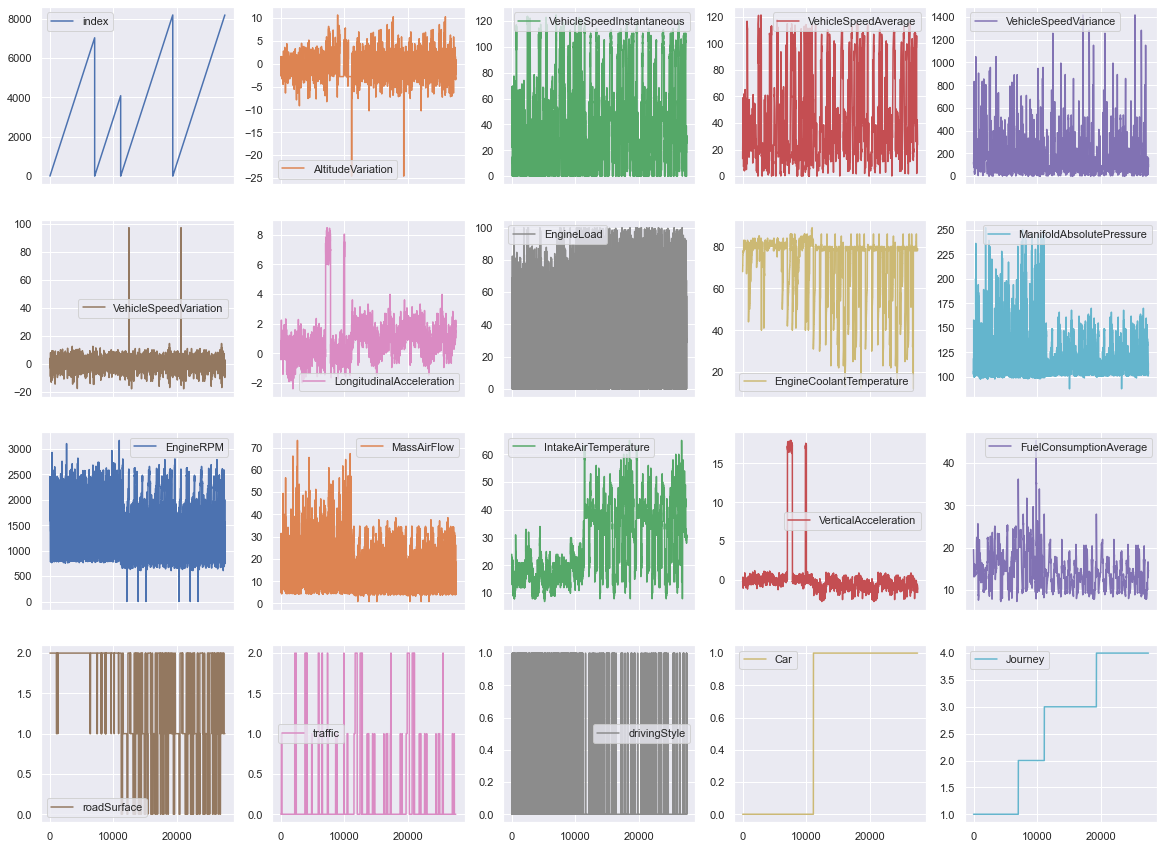

In [15]:
data_pre_cleaning.plot(subplots=True, layout=(4,5), figsize=(20,15))

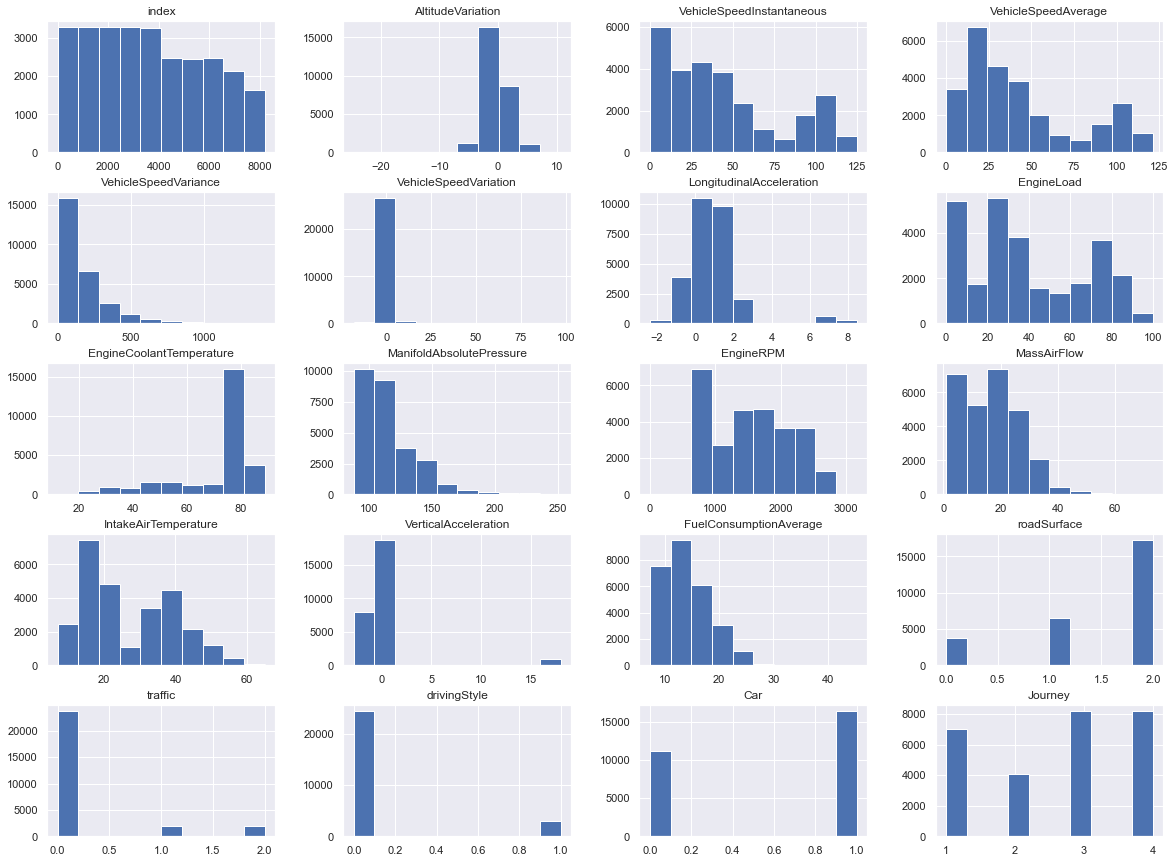

In [16]:
data_pre_cleaning.hist(layout=(5,4), figsize=(20,15))

plt.show()

## See which numerical features are correlated

<AxesSubplot:>

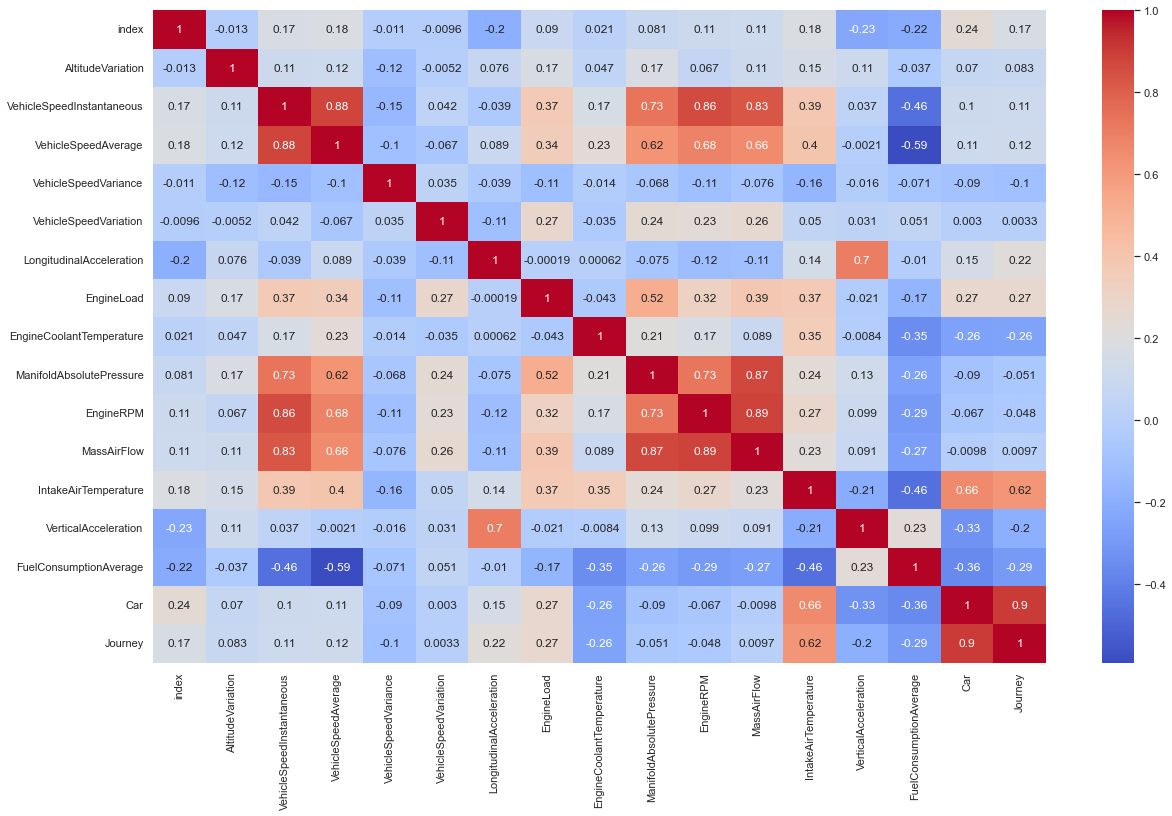

In [17]:
numerical_only_df = data_pre_cleaning.drop(["roadSurface", 'traffic','drivingStyle'], axis=1)
plt.figure(figsize=(20,12)) 
sns.heatmap(numerical_only_df.corr(), annot=True, cmap="coolwarm") 

In [18]:
target_df = clean_df['drivingStyle']

X_new = SelectKBest(chi2, k='all').fit_transform(numerical_only_df, target_df)
X_new

NameError: name 'clean_df' is not defined

From the correlation graph, the following have a correlation over 0.8
1. VehicleSpeedInstantaneous - VehicleSpeedAverage - 0.88
2. VehicleSpeedInstantaneous - EngineRPM - 0.86
3. VehicleSpeedInstantaneous - MassAirFlow - 0.83
4. ManifoldAbsolutePressure - MassAirFlow - 0.87
5. EngineRPM - MassAirFlow - 0.89
<br>


<AxesSubplot:>

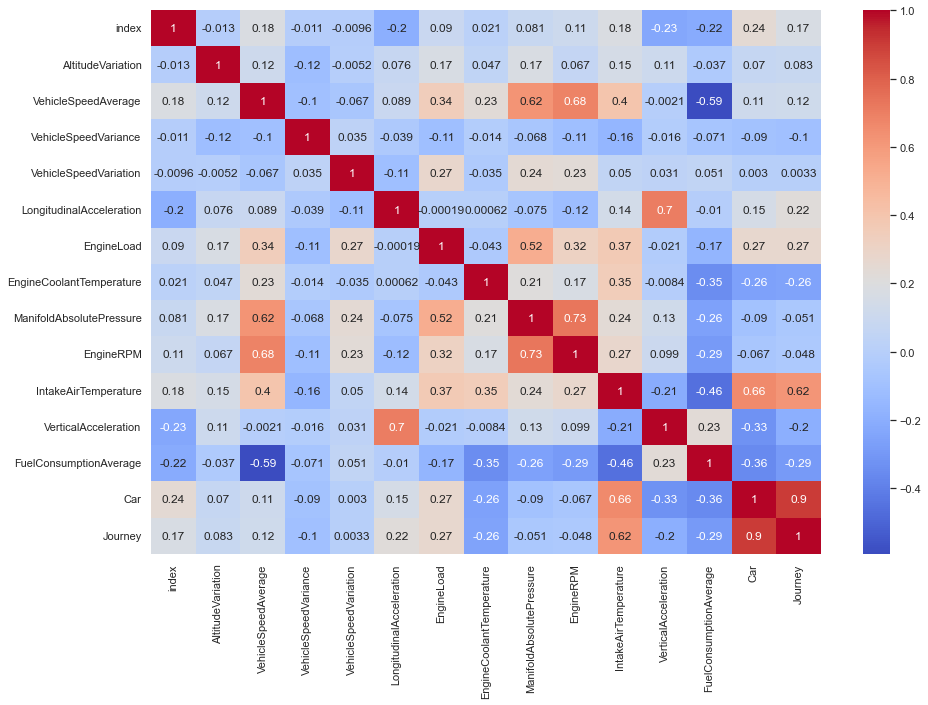

In [19]:
fig, ax = plt.subplots(figsize=(15,10)) 
columns_to_remove = ['VehicleSpeedInstantaneous', 'MassAirFlow']
sns.heatmap(numerical_only_df.drop(columns_to_remove, axis=1).corr(), annot=True, cmap="coolwarm", ax=ax) 

Remove negative correaltions
1. VehicleSpeedVariance
2. FuelConsumptionAverage
3. LongitudinalAcceleration

<AxesSubplot:>

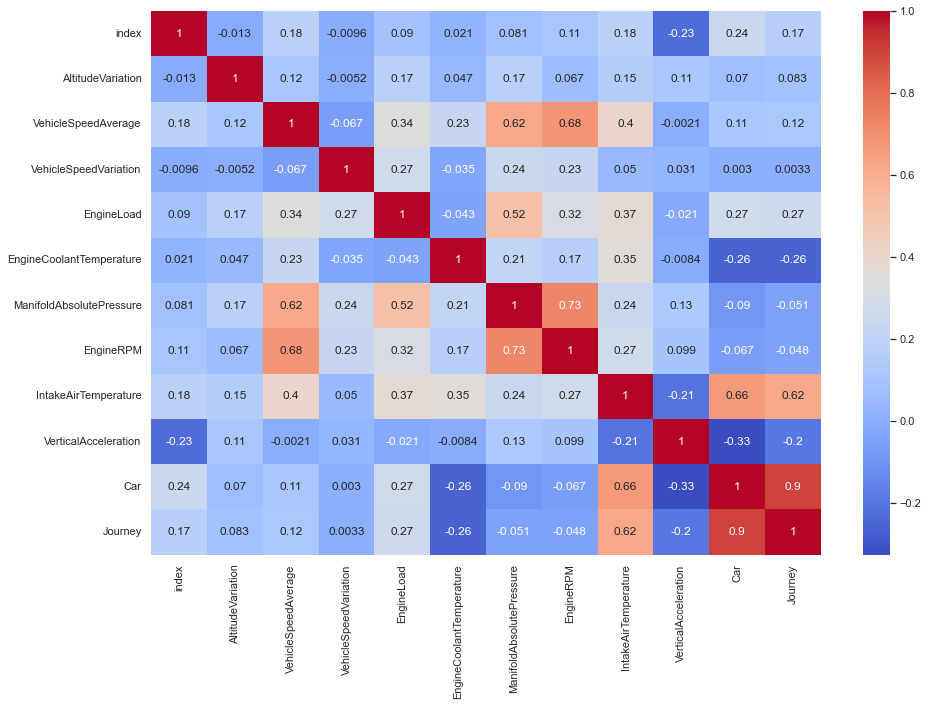

In [20]:
fig, ax = plt.subplots(figsize=(15,10)) 
columns_to_remove = ['VehicleSpeedInstantaneous', 'MassAirFlow','VehicleSpeedVariance', 'FuelConsumptionAverage', 'LongitudinalAcceleration']
sns.heatmap(numerical_only_df.drop(columns_to_remove, axis=1).corr(), annot=True, cmap="coolwarm", ax=ax) 

In [21]:
columns_to_remove.append('roadSurface')
columns_to_remove.append('traffic')
clean_df = data_pre_cleaning.drop(columns_to_remove, axis=1)

<AxesSubplot:>

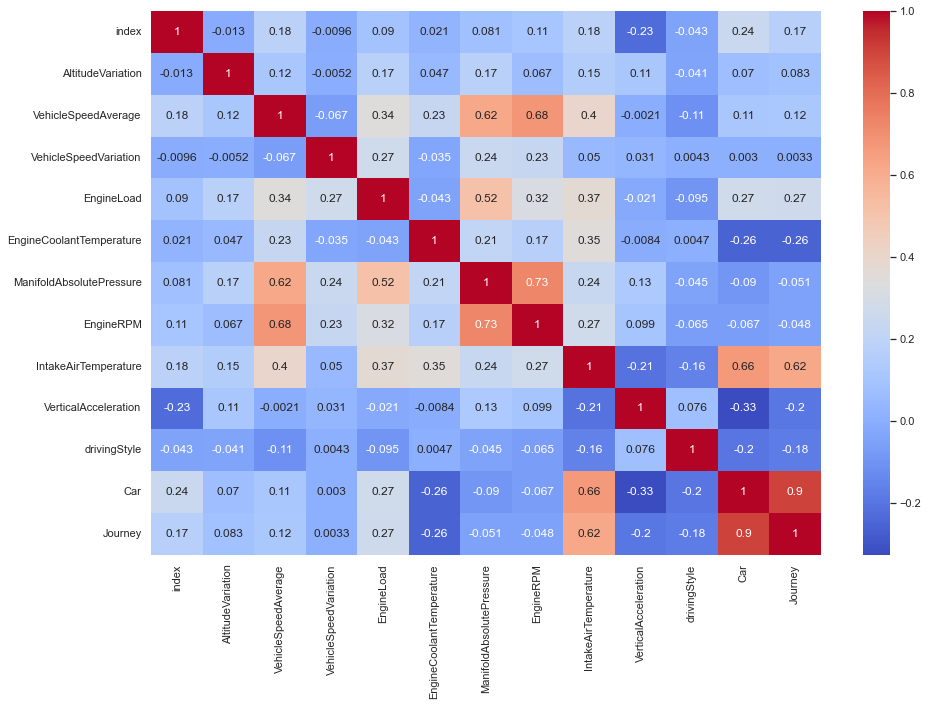

In [22]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(clean_df.corr(), annot=True, cmap="coolwarm", ax=ax) 

### Reduced feature set

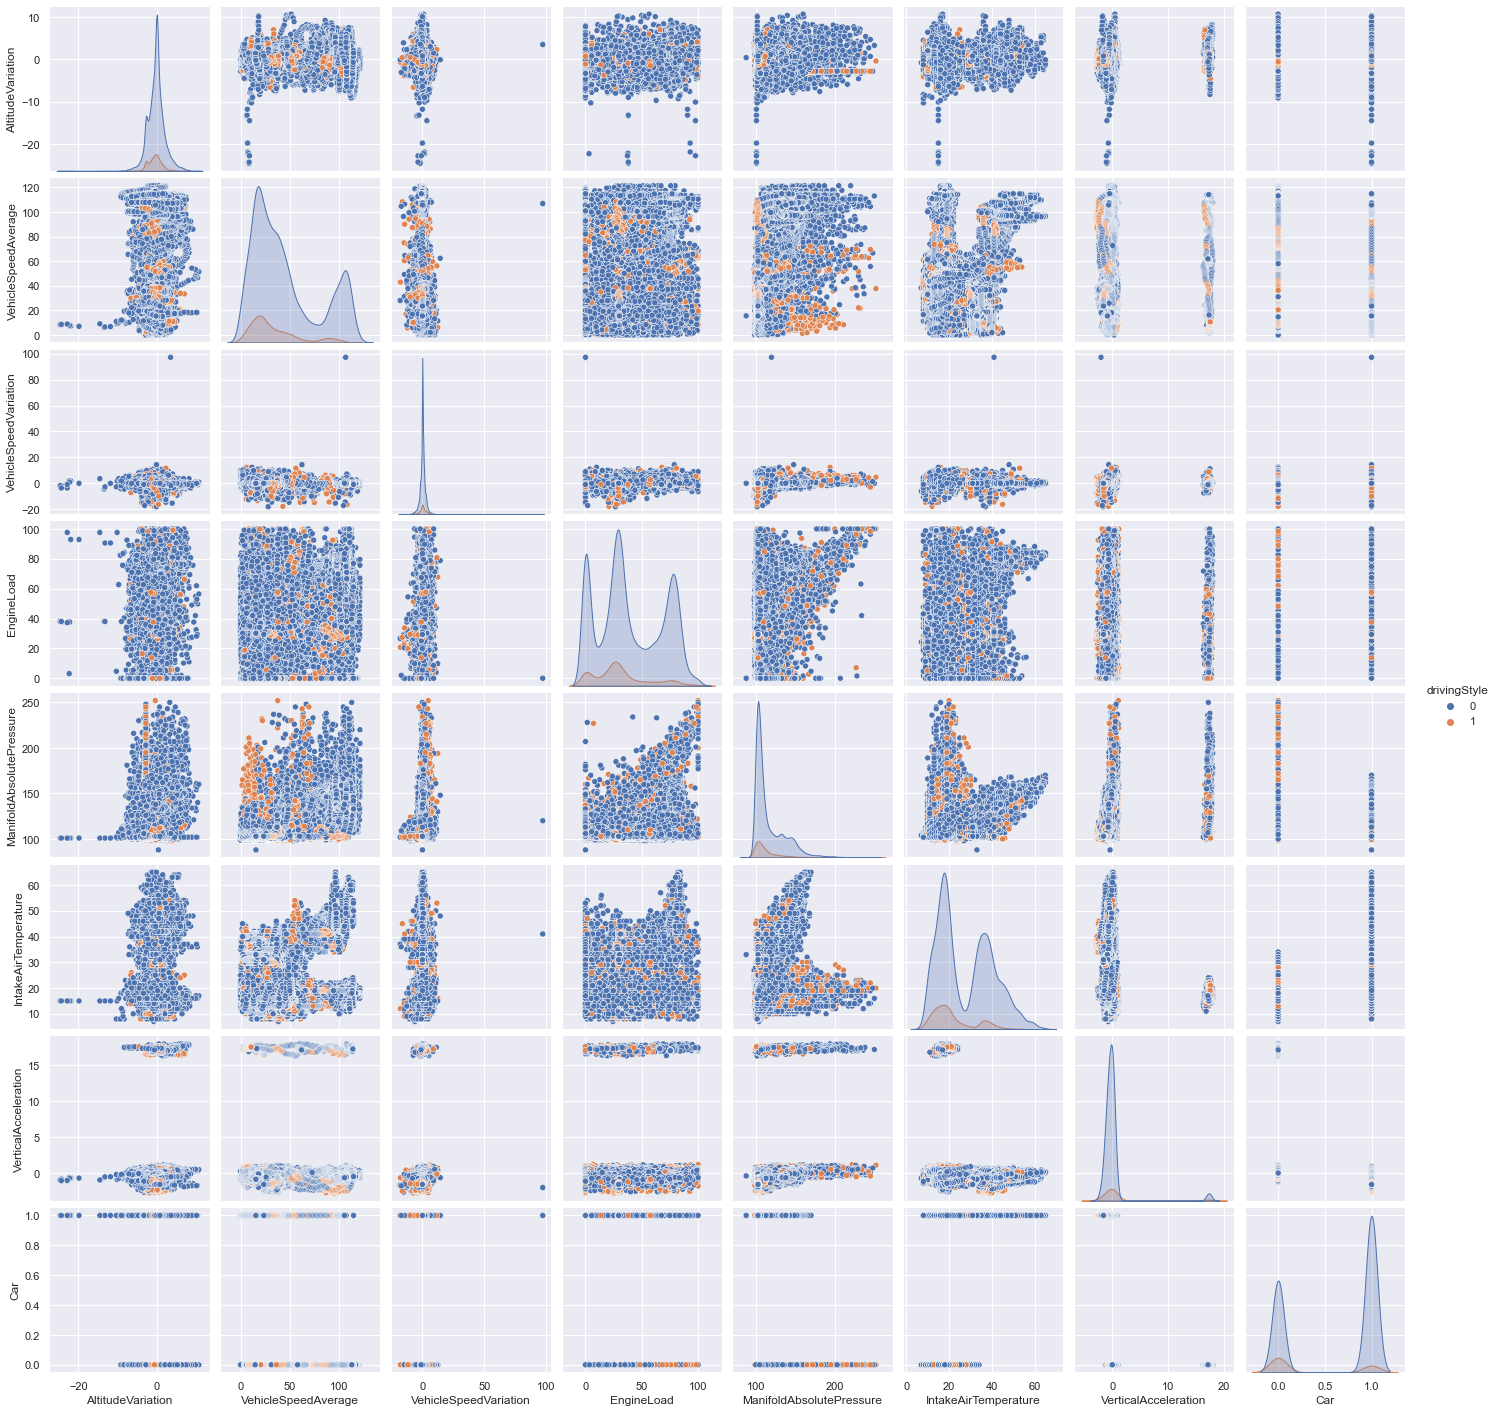

In [23]:
features = ['AltitudeVariation', 
                     'VehicleSpeedAverage',
                     'VehicleSpeedVariation',
                     'EngineLoad',
                     'ManifoldAbsolutePressure',
                     'IntakeAirTemperature',
                     'VerticalAcceleration', 
                     'Car']
sns.pairplot(clean_df, hue = 'drivingStyle', vars = features )

In [24]:
clean_pca = PCA(n_components=6)
principalComponents = clean_pca.fit_transform(clean_df)
principalDf = pd.DataFrame(data = principalComponents
             )
principalDf

0           1          2          3          4         5
0     -3635.290167  351.542514 -49.423309 -12.183591  -1.805520 -7.355400
1     -3637.534075  244.702120 -41.518546 -12.151880  -0.568553 -8.123175
2     -3639.246143  155.076009 -24.180247 -17.770919  -0.401628 -8.820461
3     -3637.612727  175.995864 -27.355729 -16.559584  -1.078305 -7.271621
4     -3633.946332  263.772719 -33.956604 -16.570476  -1.346557 -8.444320
...            ...         ...        ...        ...        ...       ...
27509  4523.252635 -940.461131   4.925398   7.165913 -10.428106  3.498411
27510  4524.266379 -940.013771   4.752708   6.643503 -10.965793  3.001436
27511  4525.204309 -942.054072   5.171349   5.765441 -11.169595  2.931207
27512  4526.260932 -940.135540   3.502730   5.921426 -11.339462  3.159519
27513  4527.258886 -940.187197   3.244133   5.445862 -11.507151  3.180219

[27514 rows x 6 columns]

In [25]:
clean_pca.explained_variance_

array([5.10719386e+06, 3.47968489e+05, 8.57155561e+02, 5.29797607e+02,
       2.38298815e+02, 1.59205597e+02])

In [26]:
clean_pca.explained_variance_ratio_

array([9.35890346e-01, 6.37650260e-02, 1.57073265e-04, 9.70851078e-05,
       4.36681211e-05, 2.91743343e-05])

<AxesSubplot:>

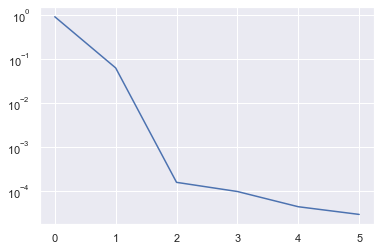

In [27]:
pd.Series(clean_pca.explained_variance_ratio_).plot(logy=True)

In [28]:
clean_df['drivingStyle'].value_counts()

0    24459
1     3055
Name: drivingStyle, dtype: int64

/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivingStyle', ylabel='count'>

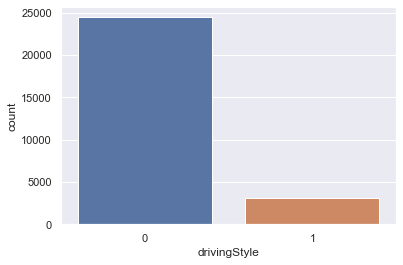

In [29]:
sns.countplot(clean_df['drivingStyle'], label = "Count") 

In [30]:
features_df = clean_df.drop(['drivingStyle'], axis=1)
features_df.head()

index  AltitudeVariation  VehicleSpeedAverage  VehicleSpeedVariation  \
0      0          -2.299988            13.223501              -2.476980   
1      1          -2.099976            13.638919              -1.576260   
2      2          -1.500000            14.031043              -1.351080   
3      3           0.100037            14.171073              -0.450359   
4      4           0.099976            14.328954               1.351080   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    4.705883                      68.0                     106.0     1796.0   
1   10.588236                      68.0                     103.0     1689.0   
2   27.450981                      68.0                     103.0     1599.0   
3   24.313726                      69.0                     104.0     1620.0   
4   20.000000                      69.0                     104.0     1708.0   

   IntakeAirTemperature  VerticalAcceleration  Car  Journey  
0                  24.0               -0.1133    0        1  
1                  22.0               -0.1289    0        1  
2                  21.0               -0.1328    0        1  
3                  20.0               -0.0859    0        1  
4                  21.0               -0.0664    0        1

In [31]:
target_df = clean_df['drivingStyle']
target_df.head() 

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

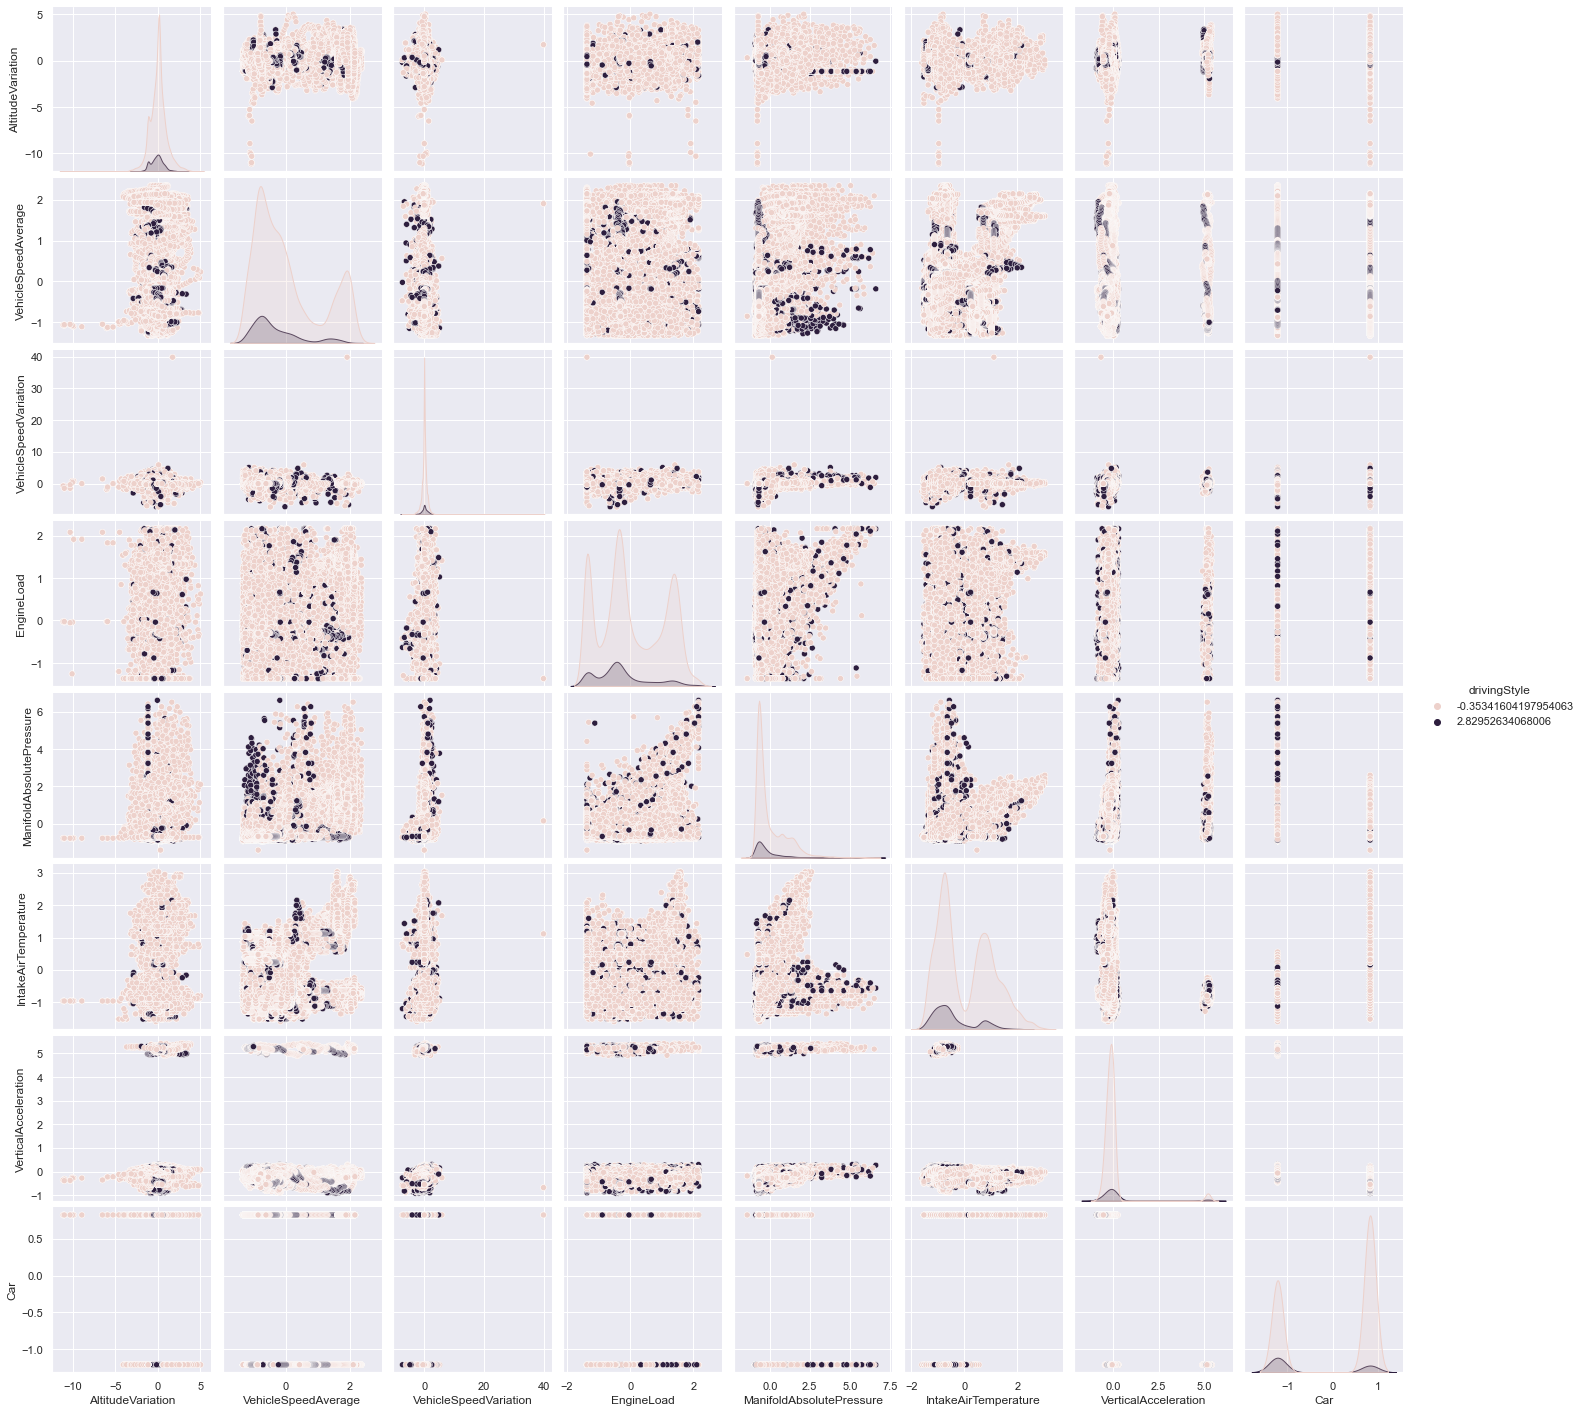

In [32]:
std_x = clean_df.copy()

std_x = pd.DataFrame(StandardScaler().fit_transform(std_x.values), columns=std_x.columns, index=std_x.index)
sns.pairplot(std_x, hue = 'drivingStyle', vars = features )

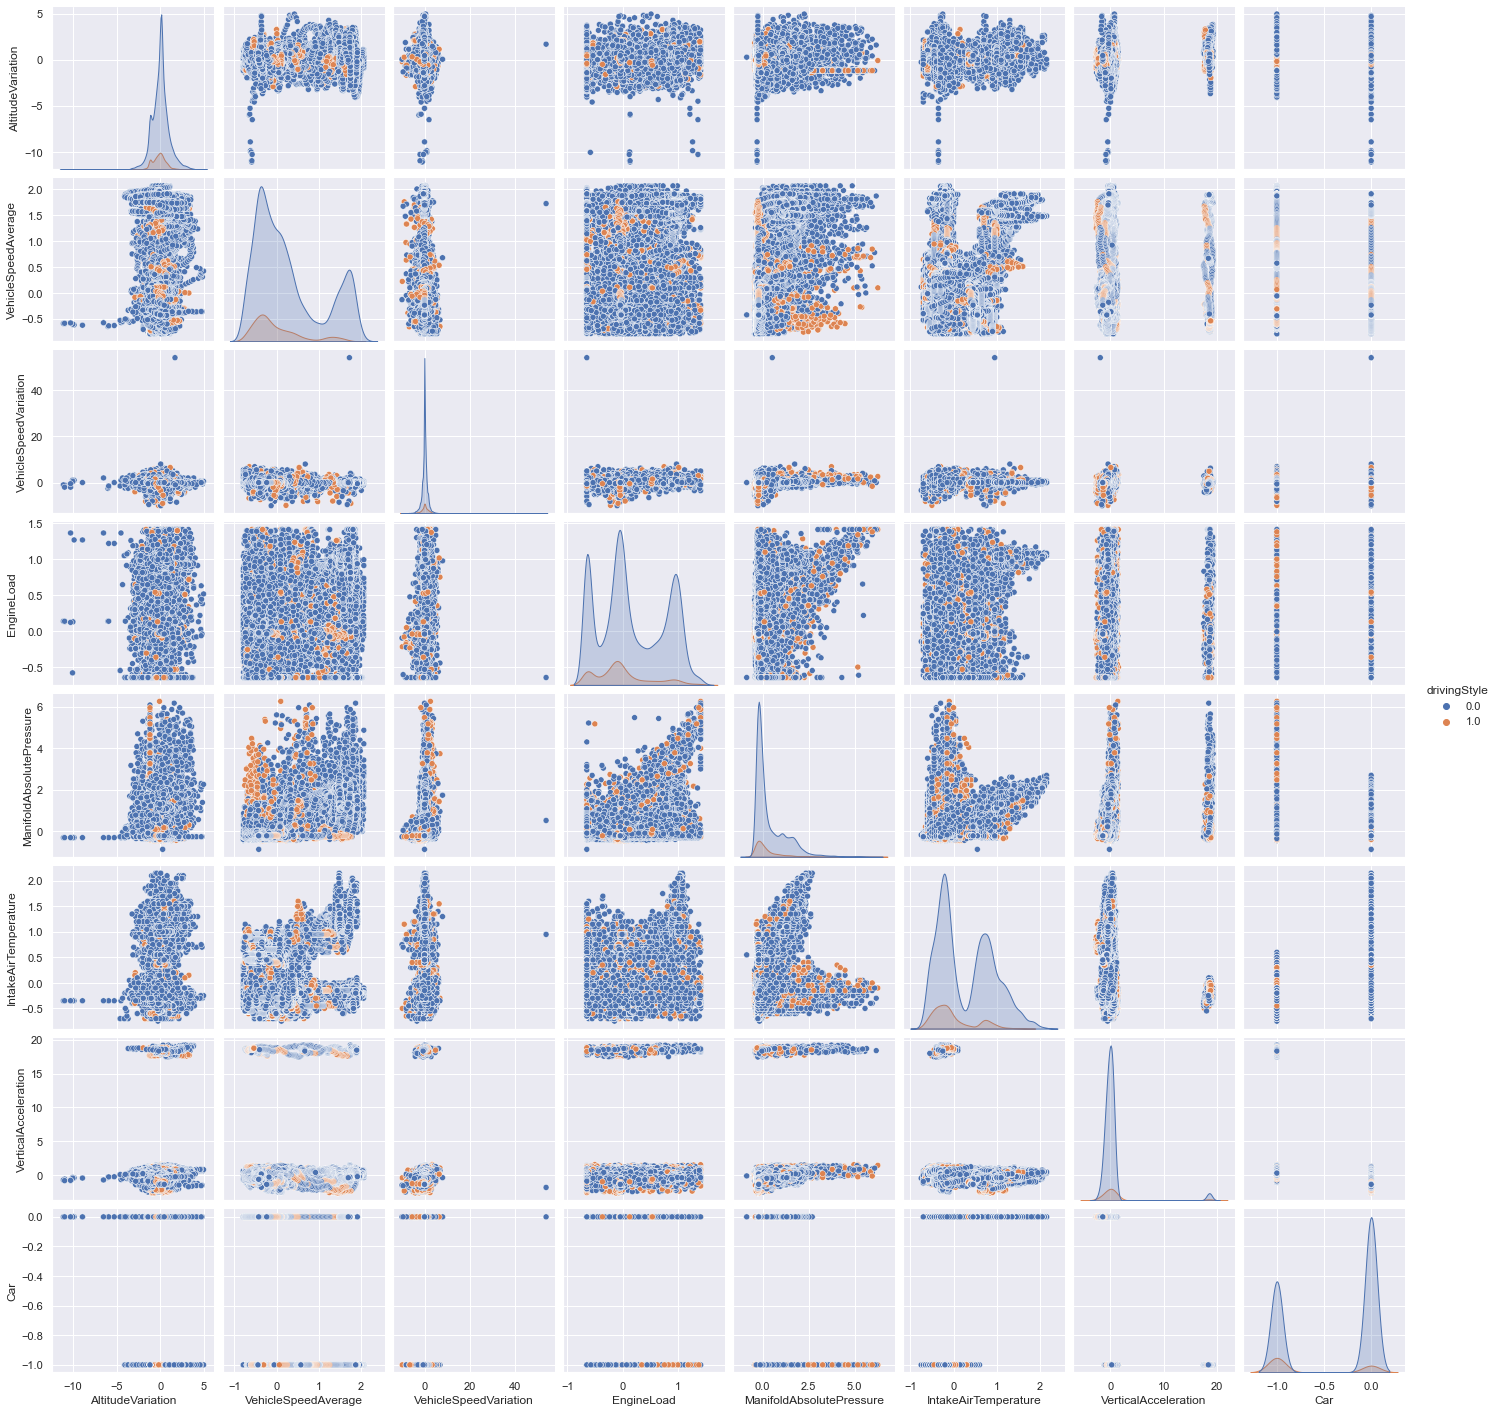

In [33]:
robust_x = pd.DataFrame(RobustScaler().fit_transform(clean_df.values), columns=clean_df.columns, index=clean_df.index)
sns.pairplot(robust_x, hue = 'drivingStyle', vars = features )

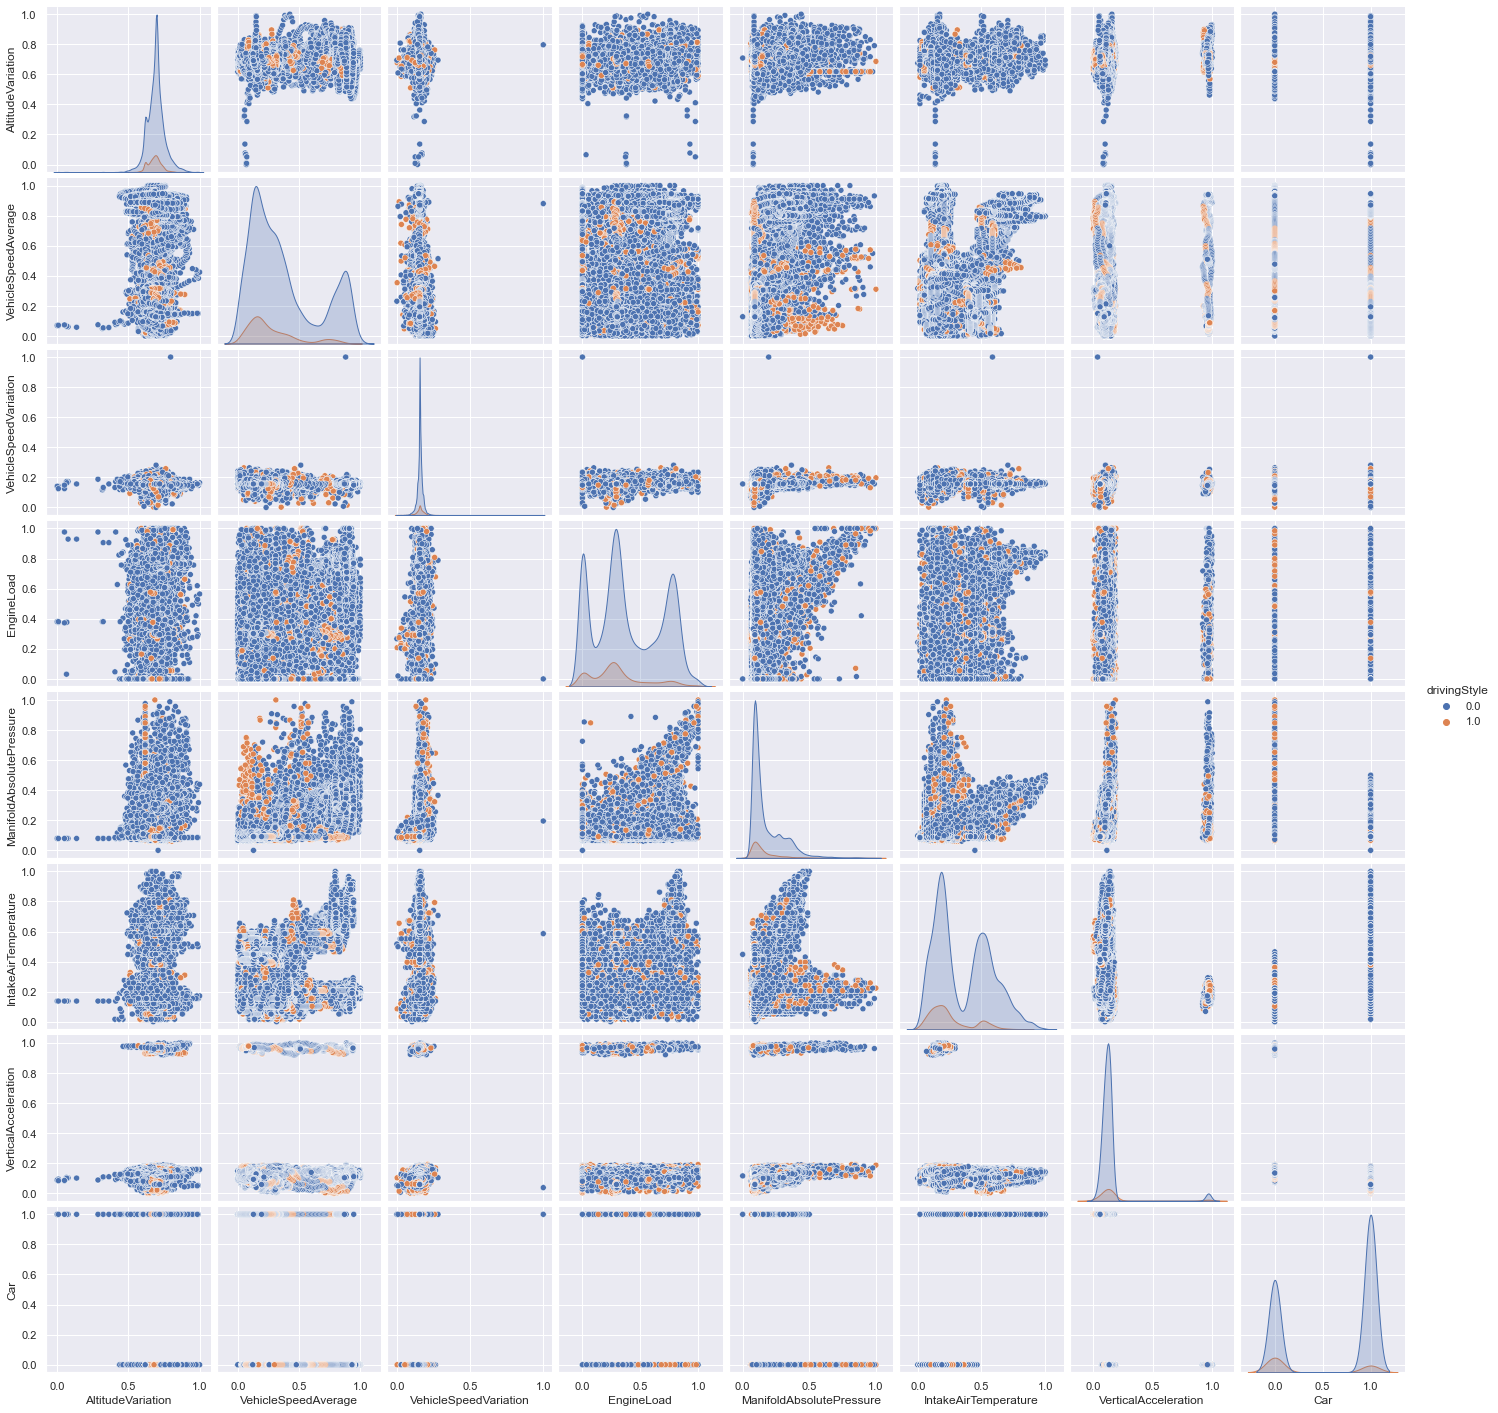

In [34]:
min_max_x = clean_df.copy()

min_max_x = pd.DataFrame(MinMaxScaler().fit_transform(min_max_x.values), columns=min_max_x.columns, index=min_max_x.index)
sns.pairplot(min_max_x, hue = 'drivingStyle', vars = features )

## Create the training and testing data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.2, random_state = 20)

In [75]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (22011, 12)


The size of our testing "X" (input features) is (5503, 12)


The size of our training "y" (output feature) is (22011,)


The size of our testing "y" (output features) is (5503,)


In [76]:
svc_model = SVC(kernel='rbf', C=1.0)
%time svc_model.fit(X_train, y_train)
%time print(svc_model.score(X_test, y_test))

CPU times: user 5.13 s, sys: 110 ms, total: 5.24 s
Wall time: 5.29 s
0.8871524622932946
CPU times: user 2.89 s, sys: 10.4 ms, total: 2.9 s
Wall time: 2.91 s


In [77]:
svc_model.fit(X_train, y_train)

SVC()

In [38]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

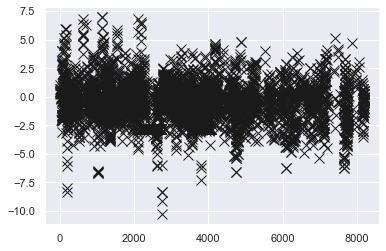

Number of support vectors:  5135


In [78]:
sv = svc_model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
plt.show()
print('Number of support vectors: ', svc_model.support_.size)

In [79]:
clf = make_pipeline(RobustScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=100000))

In [80]:
%time clf.fit(X_train, y_train)
%time print(clf.score(X_test, y_test))


CPU times: user 40.6 s, sys: 187 ms, total: 40.8 s
Wall time: 41 s
0.8871524622932946
CPU times: user 7.93 ms, sys: 981 µs, total: 8.91 ms
Wall time: 4.72 ms


               predicted_even  predicted_aggressive
is_even                  4882                     0
is_aggressive             621                     0


<AxesSubplot:>

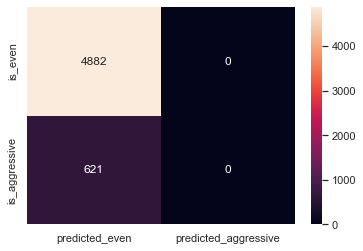

In [81]:
y_predict = clf.predict(X_test)
cm_linear_pipeline = confusion_matrix(y_test, y_predict)
confusion_linear_pipeline = pd.DataFrame(cm_linear_pipeline, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
print(confusion_linear_pipeline)
sns.heatmap(confusion_linear_pipeline,annot=True,fmt="d")

In [82]:
X_train_min = X_train.min()
X_train_min

index                        0.000000
AltitudeVariation          -24.600006
VehicleSpeedAverage          0.000000
VehicleSpeedVariation      -18.000002
EngineLoad                   0.000000
EngineCoolantTemperature    12.000000
ManifoldAbsolutePressure    88.000000
EngineRPM                    0.000000
IntakeAirTemperature         7.000000
VerticalAcceleration        -2.763100
Car                          0.000000
Journey                      1.000000
dtype: float64

In [83]:
X_train_max = X_train.max()
X_train_max

index                       8198.000000
AltitudeVariation             10.700012
VehicleSpeedAverage          121.330733
VehicleSpeedVariation         14.400000
EngineLoad                   100.000000
EngineCoolantTemperature      89.000000
ManifoldAbsolutePressure     252.000000
EngineRPM                   3167.000000
IntakeAirTemperature          65.000000
VerticalAcceleration          17.944800
Car                            1.000000
Journey                        4.000000
dtype: float64

In [84]:
X_train_range = (X_train_max- X_train_min)
X_train_range

index                       8198.000000
AltitudeVariation             35.300018
VehicleSpeedAverage          121.330733
VehicleSpeedVariation         32.400002
EngineLoad                   100.000000
EngineCoolantTemperature      77.000000
ManifoldAbsolutePressure     164.000000
EngineRPM                   3167.000000
IntakeAirTemperature          58.000000
VerticalAcceleration          20.707900
Car                            1.000000
Journey                        3.000000
dtype: float64

In [85]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

index  AltitudeVariation  VehicleSpeedAverage  \
19611  0.034399           0.728045             0.184331   
8655   0.197243           0.657223             0.172136   
7945   0.110637           0.696884             0.143772   
9219   0.266040           0.909348             0.906771   
21149  0.222005           0.671388             0.201639   

       VehicleSpeedVariation  EngineLoad  EngineCoolantTemperature  \
19611               0.583333    0.745098                  0.623377   
8655                0.534706    0.152941                  0.649351   
7945                0.555556    0.305882                  0.519481   
9219                0.472155    0.000000                  0.935065   
21149               0.388889    0.290196                  0.883117   

       ManifoldAbsolutePressure  EngineRPM  IntakeAirTemperature  \
19611                  0.128049   0.457689              0.293103   
8655                   0.103659   0.580044              0.137931   
7945                   0.067073   0.250395              0.189655   
9219                   0.146341   0.569308              0.086207   
21149                  0.085366   0.236817              0.500000   

       VerticalAcceleration  Car   Journey  
19611              0.130588  1.0  1.000000  
8655               0.157964  0.0  0.333333  
7945               0.117593  0.0  0.333333  
9219               0.135697  0.0  0.333333  
21149              0.039289  1.0  1.000000

In [86]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [87]:
svc_model = LinearSVC(random_state=0, tol=1e-5, max_iter=100000)
svc_model.fit(X_train_scaled, y_train)

LinearSVC(max_iter=100000, random_state=0, tol=1e-05)

In [88]:
svc_model.score(X_test_scaled, y_test)

0.8871524622932946

In [89]:
pipeline = make_pipeline(StandardScaler(), SVC())

In [90]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8946029438488098

In [91]:
y_predict = svc_model.predict(X_test_scaled)
cm_scaled = confusion_matrix(y_test, y_predict)

In [92]:
y_predict = pipeline.predict(X_test)
cm_pipeline = confusion_matrix(y_test, y_predict)

In [93]:
confusion_scaled = pd.DataFrame(cm_scaled, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion_scaled

predicted_even  predicted_aggressive
is_even                  4882                     0
is_aggressive             621                     0

<AxesSubplot:>

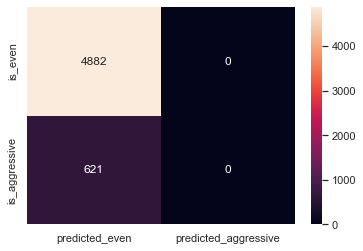

In [94]:
sns.heatmap(confusion_scaled,annot=True,fmt="d")

In [95]:
confusion_pipeline = pd.DataFrame(cm_pipeline, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion_pipeline

predicted_even  predicted_aggressive
is_even                  4868                    14
is_aggressive             566                    55

<AxesSubplot:>

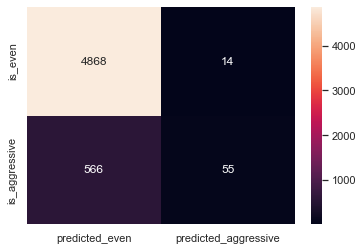

In [96]:
sns.heatmap(confusion_pipeline,annot=True,fmt="d")

/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivingStyle', ylabel='count'>

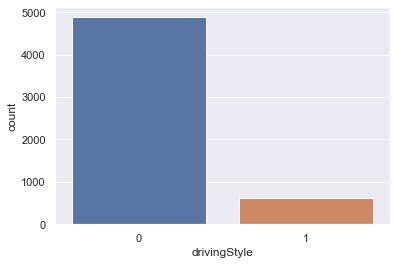

In [97]:
sns.countplot(y_test, label = "Count") 

/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

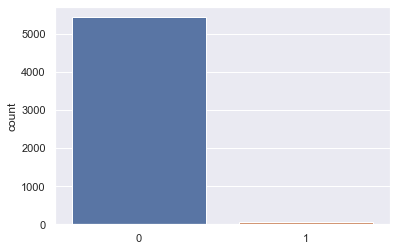

In [98]:
sns.countplot(y_predict, label = "Count") 

## GridSearch

In [110]:
param_grid = {'SVC__C': [0.1, 1, 10, 100]} 

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [111]:
SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC(max_iter=100000))])

In [112]:
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)

/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: Converge

{'SVC__C': 0.1}


In [113]:
bestlinearSVC = linearSVC.best_estimator_
bestlinearSVC.fit(X_train,y_train)
bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
bestlinearSVC.score(X_train,y_train)

0.8894189269001863

In [114]:
y_predict = bestlinearSVC.predict(X_test)
cm_bestlinear = confusion_matrix(y_test, y_predict)

In [115]:
confusion_bestlinear = pd.DataFrame(cm_bestlinear, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion_bestlinear

predicted_even  predicted_aggressive
is_even                  4882                     0
is_aggressive             621                     0

In [119]:
param_grid_svc = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [120]:
grid = GridSearchCV(SVC(),param_grid_svc,refit=True,verbose=4)

In [121]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   7.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.890 total time=   7.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   6.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   7.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   6.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   5.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   5.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   5.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   5.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   5.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.889 total time=   5.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [122]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=100, gamma=1)


In [123]:
grid_predictions = grid.predict(X_test_scaled)

In [124]:
cm_grid = np.array(confusion_matrix(y_test, grid_predictions, labels=[0,1]))
confusion_grid = pd.DataFrame(cm_grid, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion_grid

predicted_even  predicted_aggressive
is_even                  4198                   684
is_aggressive             369                   252

<AxesSubplot:>

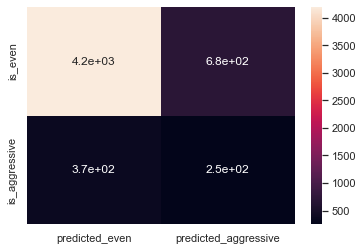

In [125]:
sns.heatmap(confusion_grid, annot=True)

In [126]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4882
           1       0.27      0.41      0.32       621

    accuracy                           0.81      5503
   macro avg       0.59      0.63      0.61      5503
weighted avg       0.85      0.81      0.82      5503



/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

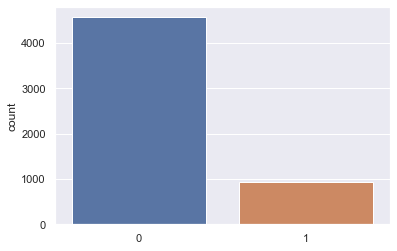

In [127]:
sns.countplot(grid_predictions, label = "Count") 